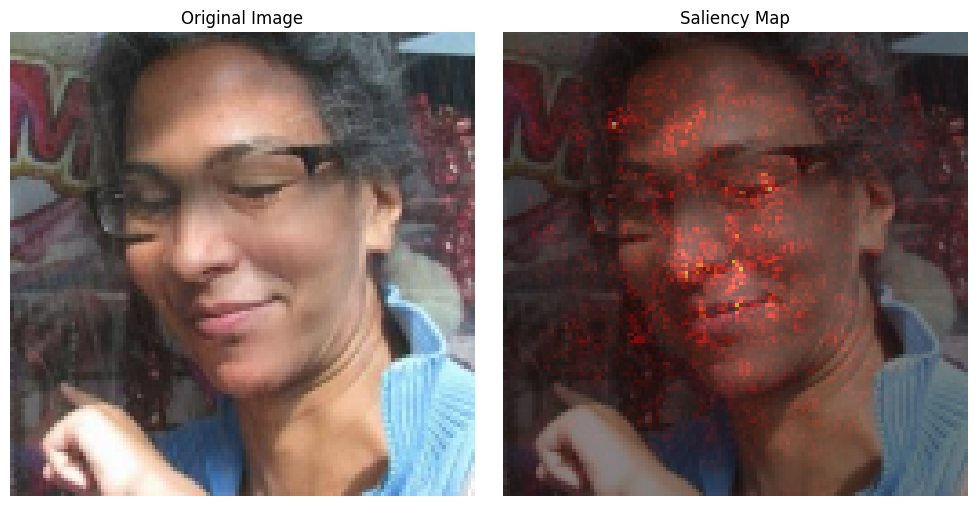

In [8]:
# Import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Define model and image paths
MODEL_PATH = "dfd_testcode.keras"
IMAGE_PATH = "sample5.jpg"

# Load the trained model
model = tf.keras.models.load_model(MODEL_PATH)

# Define the image size (should match the size used during training)
IMAGE_SIZE = (128, 128)

# Load and preprocess the image
def preprocess_image(image_path, image_size):
    img = cv2.imread(image_path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, image_size)  # Resize to the input size
    img = img / 255.0  # Scale pixel values to [0, 1]
    return img

# Preprocess the image
input_image = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

# Expand dimensions to match the model input shape
input_array = np.expand_dims(input_image, axis=0)

# Convert input array to TensorFlow tensor
input_tensor = tf.convert_to_tensor(input_array, dtype=tf.float32)

# Create Saliency Map
def compute_saliency_map(model, input_tensor):
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)  # Watch the input tensor
        predictions = model(input_tensor)  # Make predictions
        class_idx = tf.argmax(predictions[0])  # Get the predicted class
        loss = predictions[:, class_idx]  # Compute the loss for the predicted class

    # Calculate gradients of the loss w.r.t. the input
    grads = tape.gradient(loss, input_tensor)

    # Take the absolute maximum across the color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Normalize the saliency map to [0, 1]
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))
    return saliency

# Compute the saliency map
saliency_map = compute_saliency_map(model, input_tensor)

# Visualize the original image and saliency map
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

# Saliency map overlay
plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(saliency_map, cmap='hot', alpha=0.5)
plt.title("Saliency Map")
plt.axis("off")

plt.tight_layout()
plt.show()


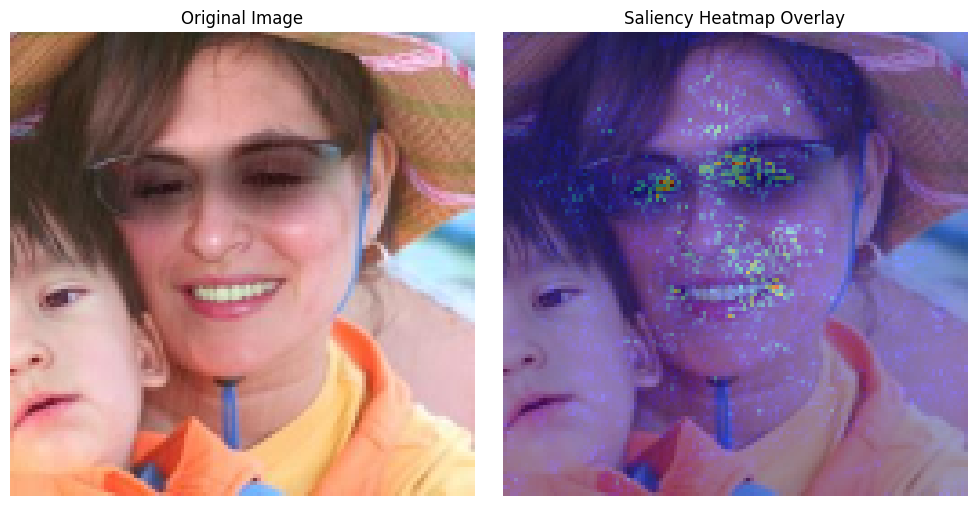

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Define model and image paths
MODEL_PATH = "dfd_testcode.keras"
IMAGE_PATH = "sample4.jpg"

# Load the trained model
model = tf.keras.models.load_model(MODEL_PATH)

# Define the image size (should match the size used during training)
IMAGE_SIZE = (128, 128)

# Load and preprocess the image
def preprocess_image(image_path, image_size):
    img = cv2.imread(image_path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, image_size)  # Resize to the input size
    img = img / 255.0  # Scale pixel values to [0, 1]
    return img

# Preprocess the image
input_image = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

# Expand dimensions to match the model input shape
input_array = np.expand_dims(input_image, axis=0)

# Convert input array to TensorFlow tensor
input_tensor = tf.convert_to_tensor(input_array, dtype=tf.float32)

# Create Saliency Map
def compute_saliency_map(model, input_tensor):
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)  # Watch the input tensor
        predictions = model(input_tensor)  # Make predictions
        class_idx = tf.argmax(predictions[0])  # Get the predicted class
        loss = predictions[:, class_idx]  # Compute the loss for the predicted class

    # Calculate gradients of the loss w.r.t. the input
    grads = tape.gradient(loss, input_tensor)

    # Take the absolute maximum across the color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Normalize the saliency map to [0, 1]
    saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))
    return saliency

# Compute the saliency map
saliency_map = compute_saliency_map(model, input_tensor)

# Convert saliency map to numpy for visualization
saliency_map = saliency_map.numpy()

# Use a predefined colormap (e.g., 'jet', 'inferno', 'plasma', 'viridis', etc.)
colormap = plt.get_cmap('jet')  # You can try other colormaps like 'inferno', 'plasma', etc.

# Apply the colormap to the saliency map
saliency_colormap = colormap(saliency_map)  # The colormap returns a (H, W, 4) array (RGBA)

# Resize the colormap to match the input image dimensions
saliency_colormap_resized = cv2.resize(saliency_colormap, (input_image.shape[1], input_image.shape[0]))

# Convert input image to uint8 for overlaying
input_image_uint8 = np.uint8(input_image * 255)

# Convert the colormap (RGBA) to uint8
saliency_colormap_resized_uint8 = np.uint8(saliency_colormap_resized[:, :, :3] * 255)

# Overlay the heatmap on the original image
overlay = cv2.addWeighted(input_image_uint8, 0.6, saliency_colormap_resized_uint8, 0.4, 0)

# Visualize the original image and the heatmap overlay
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

# Heatmap overlay
plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Saliency Heatmap Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()
